In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn")

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("data.csv")

In [4]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [6]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [7]:
df["employment_type"].unique()

array(['FT', 'CT', 'FL', 'PT'], dtype=object)

In [8]:
df["job_title"].unique()

array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
       'Applied Scientist', 'Data Analyst', 'Data Modeler',
       'Research Engineer', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Machine Learning Engineer',
       'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
       'Data Quality Analyst', 'Compliance Data Analyst',
       'Data Architect', 'Applied Machine Learning Engineer',
       'AI Developer', 'Research Scientist', 'Data Analytics Manager',
       'Business Data Analyst', 'Applied Data Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
       'Head of Data', 'Data Science Manager', 'Data Manager',
       'Machine Learning Researcher', 'Big Data Engineer',
       'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
       'Director of Data Science', 'Machine Learning Scientist',
       'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Sc

In [9]:
df["salary_currency"].unique()

array(['EUR', 'USD', 'INR', 'HKD', 'CHF', 'GBP', 'AUD', 'SGD', 'CAD',
       'ILS', 'BRL', 'THB', 'PLN', 'HUF', 'CZK', 'DKK', 'JPY', 'MXN',
       'TRY', 'CLP'], dtype=object)

In [10]:
df["employee_residence"].unique()

array(['ES', 'US', 'CA', 'DE', 'GB', 'NG', 'IN', 'HK', 'PT', 'NL', 'CH',
       'CF', 'FR', 'AU', 'FI', 'UA', 'IE', 'IL', 'GH', 'AT', 'CO', 'SG',
       'SE', 'SI', 'MX', 'UZ', 'BR', 'TH', 'HR', 'PL', 'KW', 'VN', 'CY',
       'AR', 'AM', 'BA', 'KE', 'GR', 'MK', 'LV', 'RO', 'PK', 'IT', 'MA',
       'LT', 'BE', 'AS', 'IR', 'HU', 'SK', 'CN', 'CZ', 'CR', 'TR', 'CL',
       'PR', 'DK', 'BO', 'PH', 'DO', 'EG', 'ID', 'AE', 'MY', 'JP', 'EE',
       'HN', 'TN', 'RU', 'DZ', 'IQ', 'BG', 'JE', 'RS', 'NZ', 'MD', 'LU',
       'MT'], dtype=object)

In [11]:
df["remote_ratio"].unique()

array([100,   0,  50], dtype=int64)

In [12]:
df['company_location'].unique()

array(['ES', 'US', 'CA', 'DE', 'GB', 'NG', 'IN', 'HK', 'NL', 'CH', 'CF',
       'FR', 'FI', 'UA', 'IE', 'IL', 'GH', 'CO', 'SG', 'AU', 'SE', 'SI',
       'MX', 'BR', 'PT', 'RU', 'TH', 'HR', 'VN', 'EE', 'AM', 'BA', 'KE',
       'GR', 'MK', 'LV', 'RO', 'PK', 'IT', 'MA', 'PL', 'AL', 'AR', 'LT',
       'AS', 'CR', 'IR', 'BS', 'HU', 'AT', 'SK', 'CZ', 'TR', 'PR', 'DK',
       'BO', 'PH', 'BE', 'ID', 'EG', 'AE', 'LU', 'MY', 'HN', 'JP', 'DZ',
       'IQ', 'CN', 'NZ', 'CL', 'MD', 'MT'], dtype=object)

In [13]:
df["company_size"].unique()

array(['L', 'S', 'M'], dtype=object)

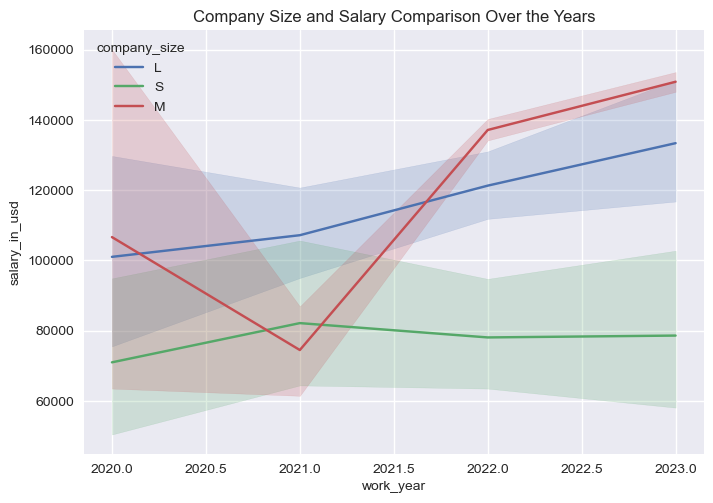

In [15]:
plt.title("Company Size and Salary Comparison Over the Years")
sns.lineplot(x="work_year" , y = "salary_in_usd" , data =df , hue = 'company_size')
plt.show()

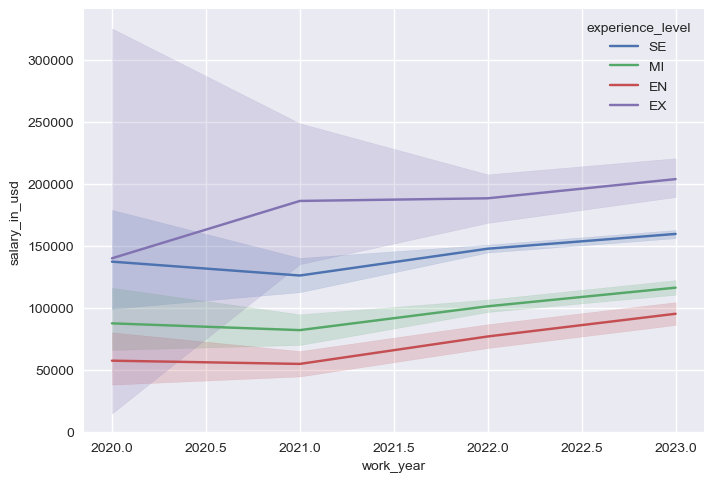

In [17]:
sns.lineplot(x="work_year" , y ="salary_in_usd" , data =df , hue = 'experience_level')
plt.show()

<Axes: xlabel='work_year', ylabel='salary_in_usd'>

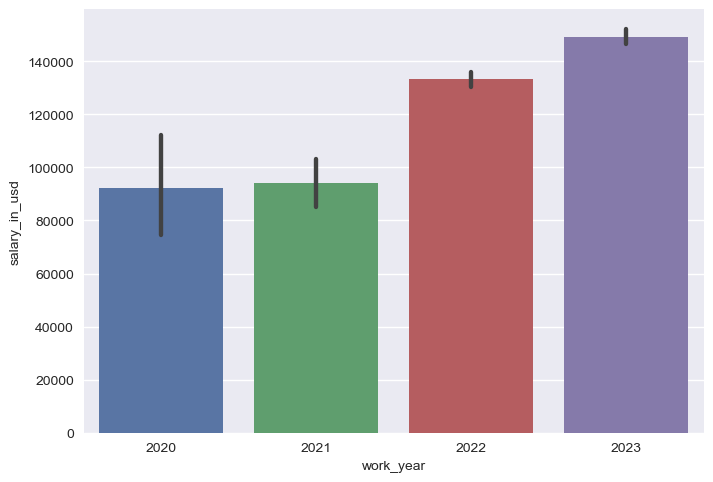

In [42]:
sns.barplot(x="work_year",y="salary_in_usd" , data=df)

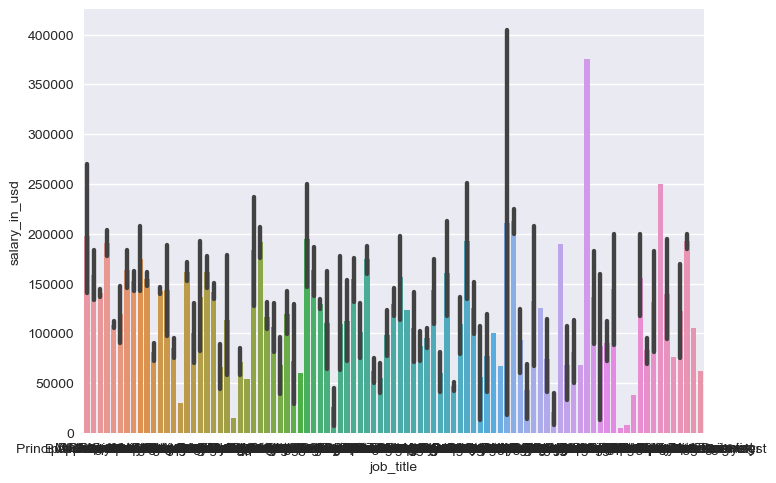

In [43]:
sns.barplot(x="job_title" , y ="salary_in_usd" , data=df)
plt.show()

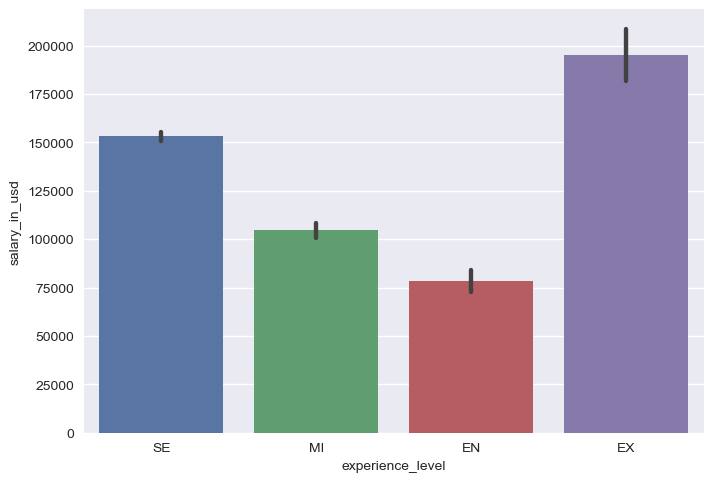

In [45]:
sns.barplot(x="experience_level" , y="salary_in_usd" , data = df)
plt.show()

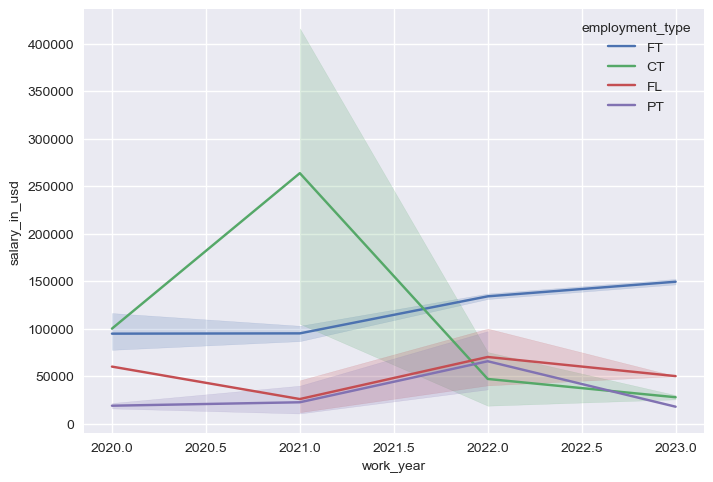

In [20]:
sns.lineplot(x="work_year" , y="salary_in_usd" , data = df , hue = 'employment_type')
plt.show()

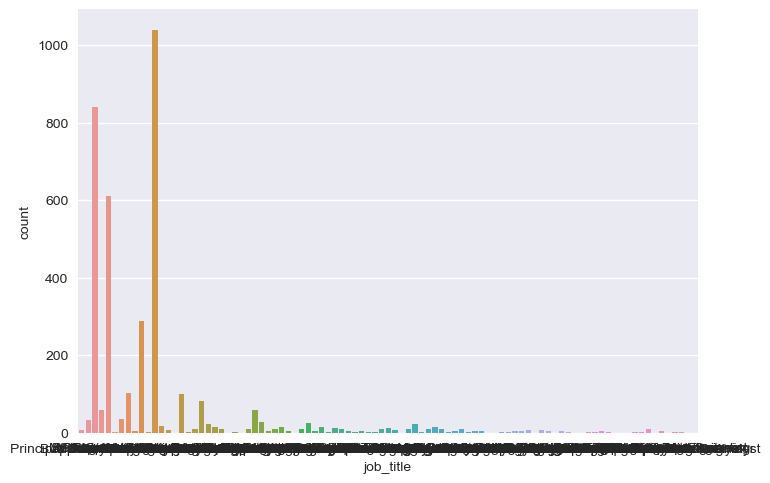

In [21]:
sns.countplot(x="job_title" , data = df)
plt.show()

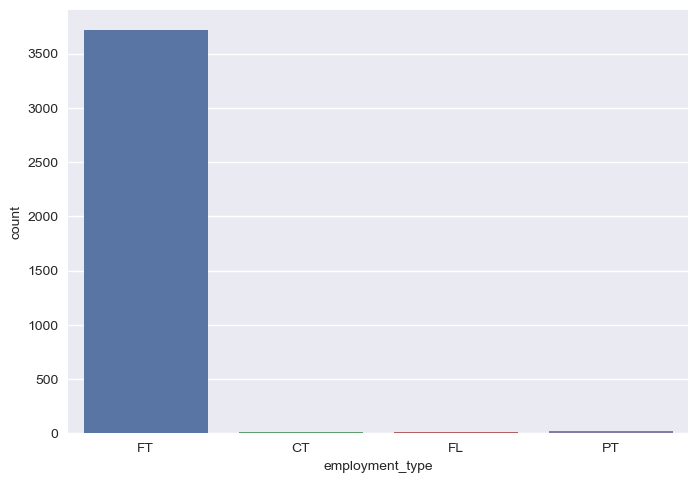

In [22]:
sns.countplot(x="employment_type" , data = df)
plt.show()

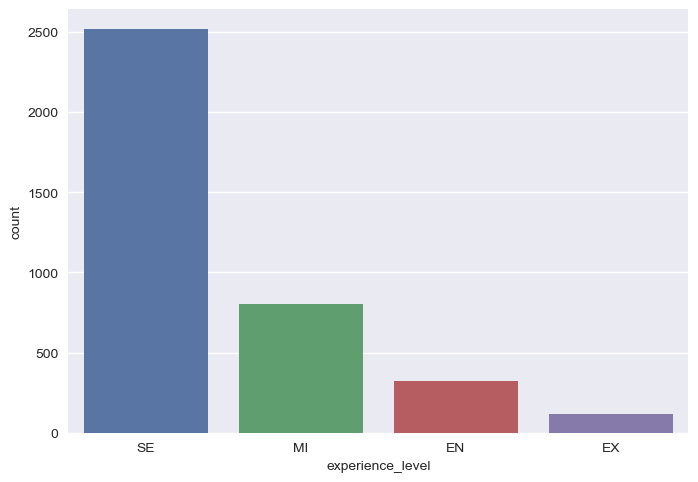

In [23]:
sns.countplot(x="experience_level" , data = df)
plt.show()

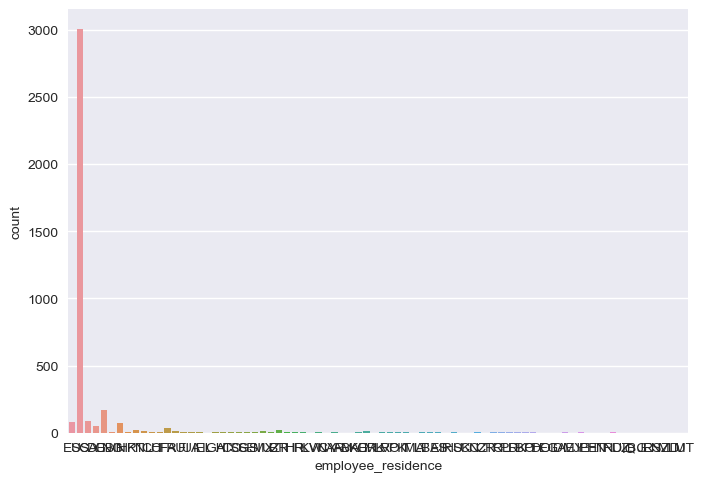

In [25]:
sns.countplot(x="employee_residence" , data = df)
plt.show()

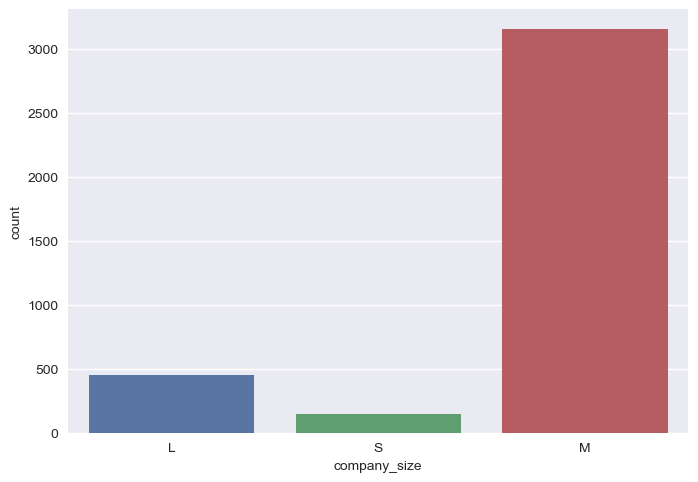

In [28]:
sns.countplot(x="company_size", data = df)
plt.show()

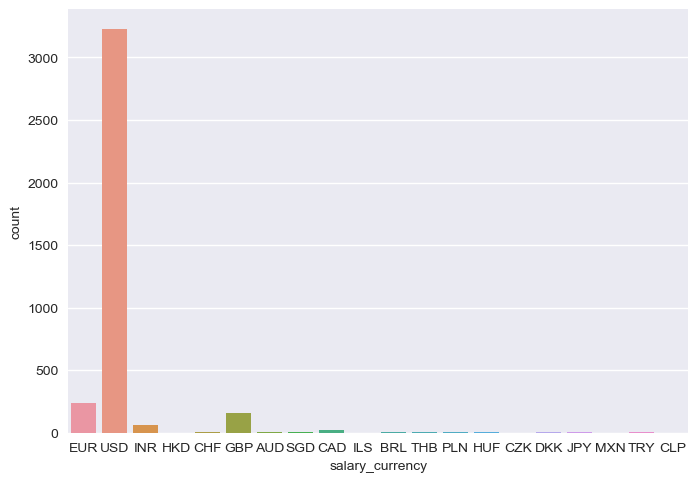

In [29]:
sns.countplot(x="salary_currency" , data = df)
plt.show()

<Axes: xlabel='salary_in_usd', ylabel='Density'>

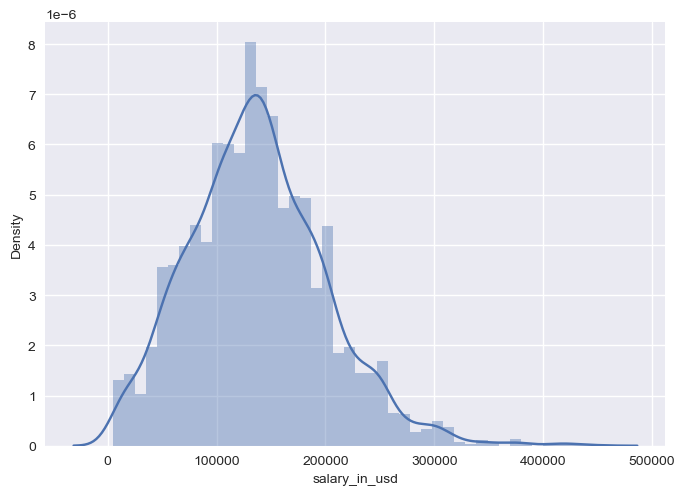

In [32]:
sns.distplot(df["salary_in_usd"])

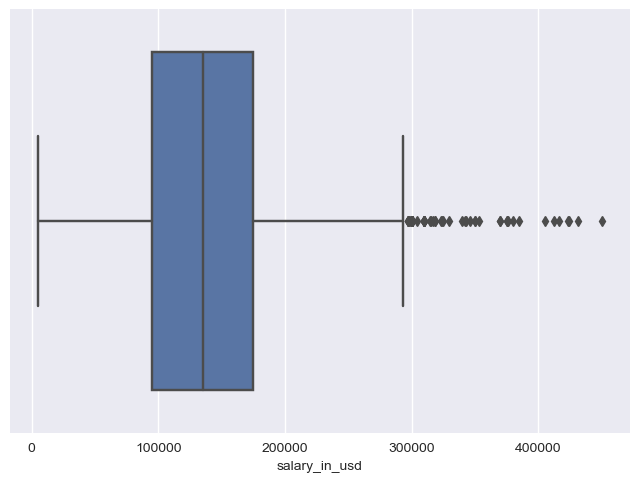

In [34]:
sns.boxplot(x="salary_in_usd" , data=df)
plt.show()

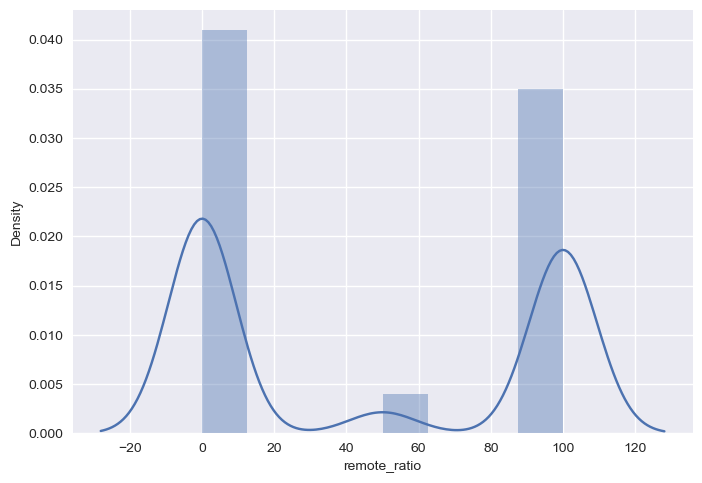

In [36]:
sns.distplot(df["remote_ratio"])
plt.show()

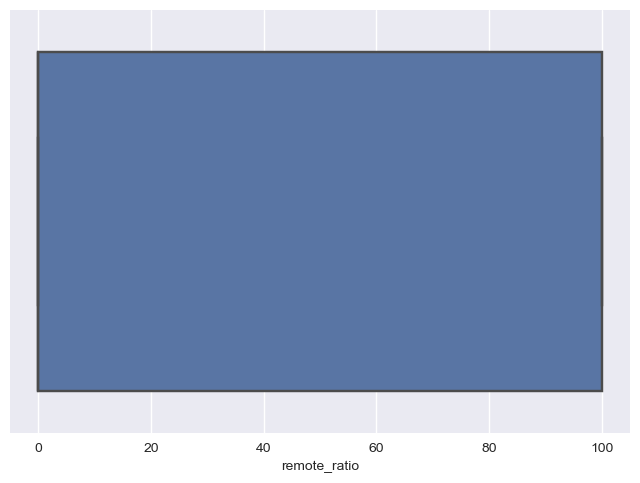

In [37]:
sns.boxplot(x="remote_ratio" , data=df)
plt.show()

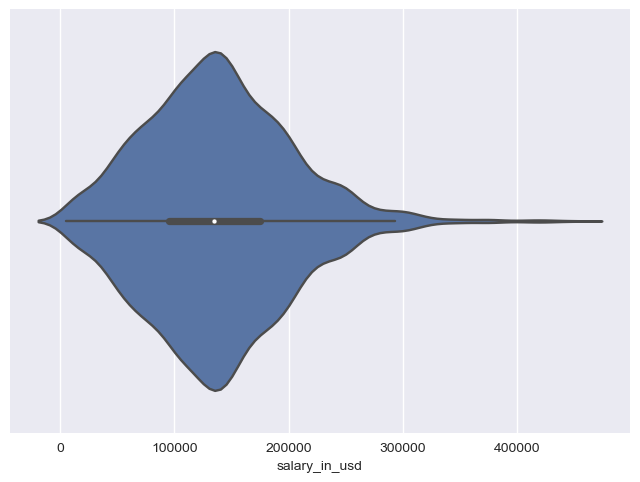

In [40]:
sns.violinplot(x="salary_in_usd" , data = df)
plt.show()

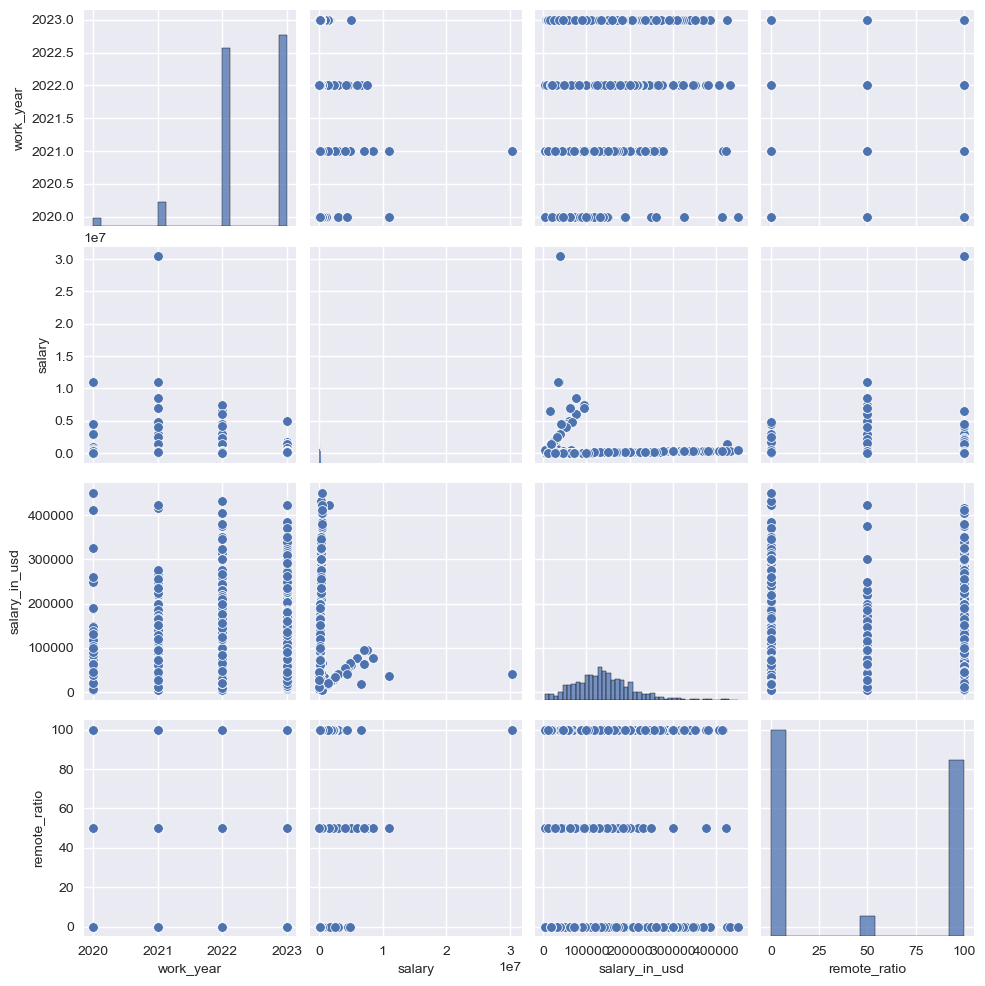

In [48]:
sns.pairplot(df)
plt.show()

In [50]:
from sklearn import preprocessing

In [51]:
for col in df.select_dtypes(include=['object']).columns:
    label_encoder = preprocessing.LabelEncoder()
    label_encoder.fit(df[col].unique())
    df[col] = label_encoder.transform(df[col])
    

In [52]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,3,2,84,80000,7,85847,26,100,25,0
1,2023,2,0,66,30000,19,30000,75,100,70,2
2,2023,2,0,66,25500,19,25500,75,100,70,2
3,2023,3,2,47,175000,19,175000,11,100,12,1
4,2023,3,2,47,120000,19,120000,11,100,12,1
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,3,2,47,412000,19,412000,75,100,70,0
3751,2021,2,2,84,151000,19,151000,75,100,70,0
3752,2020,0,2,47,105000,19,105000,75,100,70,2
3753,2020,0,0,17,100000,19,100000,75,100,70,0


In [55]:
X = df[["work_year" , "experience_level" , "employment_type" , "job_title" ,  "employee_residence" , "remote_ratio" , "company_location" , "company_size"]]

In [57]:
y = df["salary_in_usd"]

In [58]:
X

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size
0,2023,3,2,84,26,100,25,0
1,2023,2,0,66,75,100,70,2
2,2023,2,0,66,75,100,70,2
3,2023,3,2,47,11,100,12,1
4,2023,3,2,47,11,100,12,1
...,...,...,...,...,...,...,...,...
3750,2020,3,2,47,75,100,70,0
3751,2021,2,2,84,75,100,70,0
3752,2020,0,2,47,75,100,70,2
3753,2020,0,0,17,75,100,70,0


In [59]:
y

0        85847
1        30000
2        25500
3       175000
4       120000
         ...  
3750    412000
3751    151000
3752    105000
3753    100000
3754     94665
Name: salary_in_usd, Length: 3755, dtype: int64

In [62]:
def featurescaling(X):
    Xmean = X.mean(axis=0)
    Xstd = X.std(axis=0)
    
    return (X - Xmean)/Xstd

In [65]:
X = featurescaling(X)

In [66]:
X.mean(axis=0)

work_year            -1.592524e-13
experience_level      2.119329e-16
employment_type       4.484651e-16
job_title            -6.812127e-17
employee_residence    1.967948e-16
remote_ratio          9.082837e-17
company_location     -6.055224e-17
company_size         -1.059664e-16
dtype: float64

In [67]:
X.std(axis=0)

work_year             1.0
experience_level      1.0
employment_type       1.0
job_title             1.0
employee_residence    1.0
remote_ratio          1.0
company_location      1.0
company_size          1.0
dtype: float64

In [70]:
from sklearn.feature_selection import SelectKBest

In [73]:
best_features = SelectKBest(k = 'all')
fit = best_features.fit(X,y)

In [74]:
fit.scores_

array([3.0133428 , 2.96560042, 2.75607371, 1.92559143, 8.06853992,
       1.99954555, 8.45342443, 3.05515495])

In [76]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featurescore = pd.concat([dfcolumns , dfscores], axis= 1)

In [77]:
featurescore.columns = ['Feature Name' , 'Score']

In [78]:
featurescore

,Feature Name,Score
0,work_year,3.013343
1,experience_level,2.965600
2,employment_type,2.756074
3,job_title,1.925591
4,employee_residence,8.068540
5,remote_ratio,1.999546
6,company_location,8.453424
7,company_size,3.055155


In [80]:
featurescore.sort_values(by="Score" , ascending = False)

,Feature Name,Score
6,company_location,8.453424
4,employee_residence,8.068540
7,company_size,3.055155
0,work_year,3.013343
1,experience_level,2.965600
2,employment_type,2.756074
5,remote_ratio,1.999546
3,job_title,1.925591


In [115]:
def outlier(X):
    q1 = np.percentile(X,25)
    q3 = np.percentile(X,75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    X1 = X[(X>=lower_bound) & (X<= upper_bound)]
    
    return X1

In [116]:
X = outlier(X)

In [117]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           3449 non-null   float64
 1   experience_level    3435 non-null   float64
 2   employment_type     3718 non-null   float64
 3   job_title           3583 non-null   float64
 4   employee_residence  3459 non-null   float64
 5   remote_ratio        3755 non-null   float64
 6   company_location    3420 non-null   float64
 7   company_size        3153 non-null   float64
dtypes: float64(8)
memory usage: 234.8 KB


In [138]:
 X = X.fillna(X.median())

In [139]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           3755 non-null   float64
 1   experience_level    3755 non-null   float64
 2   employment_type     3755 non-null   float64
 3   job_title           3755 non-null   float64
 4   employee_residence  3755 non-null   float64
 5   remote_ratio        3755 non-null   float64
 6   company_location    3755 non-null   float64
 7   company_size        3755 non-null   float64
dtypes: float64(8)
memory usage: 234.8 KB


In [140]:
Xtrain , Xtest , ytrain , ytest = train_test_split(X,y , shuffle = True)

In [141]:
Xtrain.shape

(2816, 8)

In [142]:
Xtest.shape

(939, 8)

In [143]:
model = LinearRegression()

In [144]:
model.fit(Xtrain,ytrain)

LinearRegression()

In [145]:
y_predict = model.predict(Xtest)

In [146]:
from sklearn.metrics import r2_score

In [147]:
r2 = r2_score(ytest,y_predict)

In [148]:
r2

0.17471303741313915

In [149]:
X_new = df[['company_location' , 'employee_residence' , 'company_size' , 'work_year' ]]

In [150]:
Xtrain , Xtest , ytrain , ytest = train_test_split(X_new,y , shuffle = True)

In [151]:
model = LinearRegression()

In [152]:
model.fit(Xtrain,ytrain)

LinearRegression()

In [153]:
y_predict = model.predict(Xtest)

In [158]:
r2new = r2_score(ytest,y_predict)

In [159]:
r2new

0.1963367599892446